In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
import requests
import time
import pandas as pd
import matplotlib.pyplot as plt
from mpl_finance import candlestick2_ohlc
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data  
from datetime import datetime
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

C:\Users\vxpko\anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [2]:
def stock(n):
    driver = webdriver.Chrome('C:\/chromedriver.exe')
    driver.get('https://m.stock.naver.com/index.nhn')
    driver.find_element_by_xpath('//*[@id="header"]/div[1]/div[2]/a[1]/span').click()
    stock=[]
    for i in range(1,n):
        driver.find_element_by_xpath('//*[@id="searchResult"]/li[{}]/a'.format(i)).click()
        time.sleep(1)
        driver.find_element_by_xpath('//*[@id="common_component_tab"]/div/ul/li[4]/a').click()
        time.sleep(1)
        for i in range(3):
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            time.sleep(1)
        driver.find_element_by_xpath('//*[@id="content"]/div[4]/div[3]/div[2]/div/div[3]/a').click()
        time.sleep(1)
        html = driver.page_source
        soup=BeautifulSoup(html, 'html.parser')

        for i in soup.select_one('tbody'):
            company=[]
            company.append(driver.find_element_by_xpath('//*[@id="content"]/div[2]/div[1]/div[1]/span[2]').text)
            company.append(i.select('.VTablePrice_td__PZi0o')[0].text)
            company.append(i.select('.VTablePrice_td__PZi0o')[1].text.replace(',',''))
            company.append(i.select('.VTablePrice_td__PZi0o')[3].text)
            company.append(i.select('.VTablePrice_td__PZi0o')[4].text.replace(',',''))
            company.append(i.select('.VTablePrice_td__PZi0o')[5].text.replace(',',''))
            company.append(i.select('.VTablePrice_td__PZi0o')[6].text.replace(',',''))
            company.append(i.select('.VTablePrice_td__PZi0o')[7].text.replace(',',''))

            stock.append(company)
    #         print(stock)
        driver.back()

        driver.back()
        time.sleep(1)
        
        
    col=['name','date','end','drop_rate','start','high','low','volume']
    df = pd.DataFrame(stock,columns=col)
    df.to_csv("stock.csv", mode='a',header=True,index=False)   
    
    return df

In [4]:
stock(3)

,name,date,end,drop_rate,start,high,low,volume
0,에이치엘비,07.15,37150,+5.54%,35700,43000,35050,22659431
1,에이치엘비,07.14,35200,-0.14%,35250,36200,34450,1272494
2,에이치엘비,07.13,35250,+4.29%,33800,36400,33550,3149431
3,에이치엘비,07.12,33800,-0.15%,33850,34400,33650,428097
4,에이치엘비,07.09,33850,-2.59%,34250,34550,33500,980458
...,...,...,...,...,...,...,...,...
155,삼성전자,03.30,82200,+0.74%,81600,82300,81300,13121698
156,삼성전자,03.29,81600,+0.12%,81700,81700,81000,14952134
157,삼성전자,03.26,81500,+0.37%,81400,81600,81000,12845778
158,삼성전자,03.25,81200,+0.25%,81000,82100,80800,14758826


In [19]:
df=pd.read_csv('./stock.csv')
# df_=df[df['name']='삼성전자']
df

,name,date,end,drop_rate,start,high,low,volume
0,에이치엘비,7.15,37150,+5.54%,35700,43000,35050,22659431
1,에이치엘비,7.14,35200,-0.14%,35250,36200,34450,1272494
2,에이치엘비,7.13,35250,+4.29%,33800,36400,33550,3149431
3,에이치엘비,7.12,33800,-0.15%,33850,34400,33650,428097
4,에이치엘비,7.09,33850,-2.59%,34250,34550,33500,980458
...,...,...,...,...,...,...,...,...
155,삼성전자,3.30,82200,+0.74%,81600,82300,81300,13121698
156,삼성전자,3.29,81600,+0.12%,81700,81700,81000,14952134
157,삼성전자,3.26,81500,+0.37%,81400,81600,81000,12845778
158,삼성전자,3.25,81200,+0.25%,81000,82100,80800,14758826


In [21]:
df_=df[df['name']=='삼성전자']
df_

,name,date,end,drop_rate,start,high,low,volume
80,삼성전자,7.15,80600,+1.38%,79800,80600,79500,12964019
81,삼성전자,7.14,79500,-0.38%,79400,79600,79100,11575636
82,삼성전자,7.13,79800,+0.13%,80000,80200,79800,9863450
83,삼성전자,7.12,79700,+0.38%,79900,80000,79500,9768108
84,삼성전자,7.09,79400,-0.63%,79600,79800,79000,22720577
...,...,...,...,...,...,...,...,...
155,삼성전자,3.30,82200,+0.74%,81600,82300,81300,13121698
156,삼성전자,3.29,81600,+0.12%,81700,81700,81000,14952134
157,삼성전자,3.26,81500,+0.37%,81400,81600,81000,12845778
158,삼성전자,3.25,81200,+0.25%,81000,82100,80800,14758826


In [22]:
def stock_candle(n):
    df=pd.read_csv('./stock.csv')
    df_=df[df['name']==n]
    df_['MA3'] = df_['end'].rolling(3).mean()
    df_['MA5'] = df_['end'].rolling(5).mean()
    df_['MA10'] = df_['end'].rolling(10).mean()
    df_['MA20'] = df_['end'].rolling(20).mean()

    # 그래프 그리기
    fig, ax = plt.subplots(figsize=(10,5))

    ax.set_title('INDEX', fontsize=15)
    ax.set_ylabel("Inter")
    ax.set_xlabel("Date Time")
    ax.plot(df_.index, df_[['end','MA5','MA10']])
    ax.legend(['end','MA5','MA10'])
    plt.show()
    
    
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    index = df_.index.astype('str') # 캔들스틱 x축이 str로 들어감

    # 이동평균선 그리기
    ax.plot(index, df_['MA3'], label='MA3', linewidth=0.7)
    ax.plot(index, df_['MA5'], label='MA5', linewidth=0.7)
    ax.plot(index, df_['MA10'], label='MA10', linewidth=0.7)

    # X축 티커 숫자 20개로 제한
    ax.xaxis.set_major_locator(ticker.MaxNLocator(20))

    # 그래프 title과 축 이름 지정
    ax.set_title('INDEX', fontsize=22)
    ax.set_xlabel('Date')

    # 캔들차트 그리기
    candlestick2_ohlc(ax, df_['start'], df_['high'], 
                      df_['low'], df_['end'],
                      width=0.5, colorup='r', colordown='b')
    ax.legend()
    plt.grid()
    plt.show()

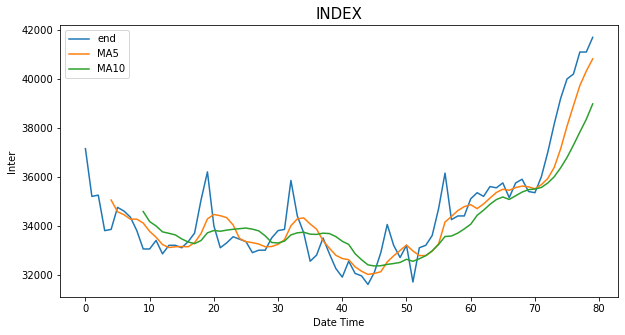

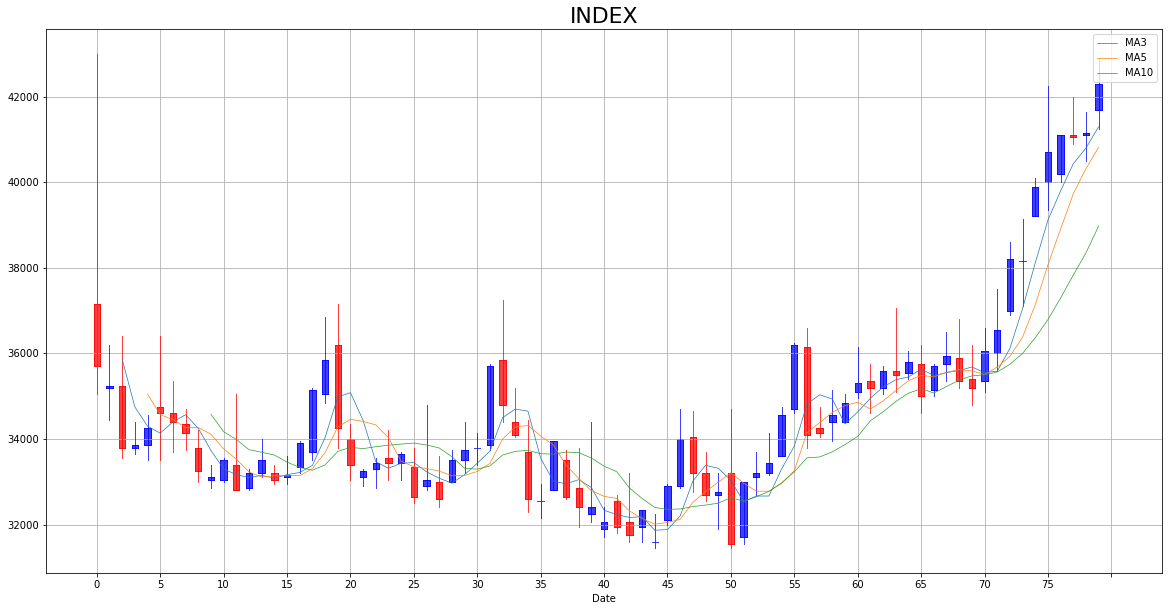

In [24]:
stock_candle('에이치엘비')

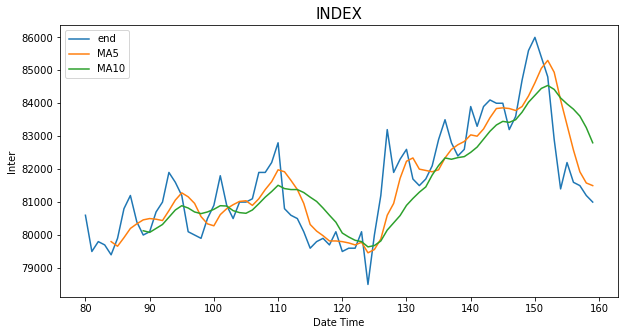

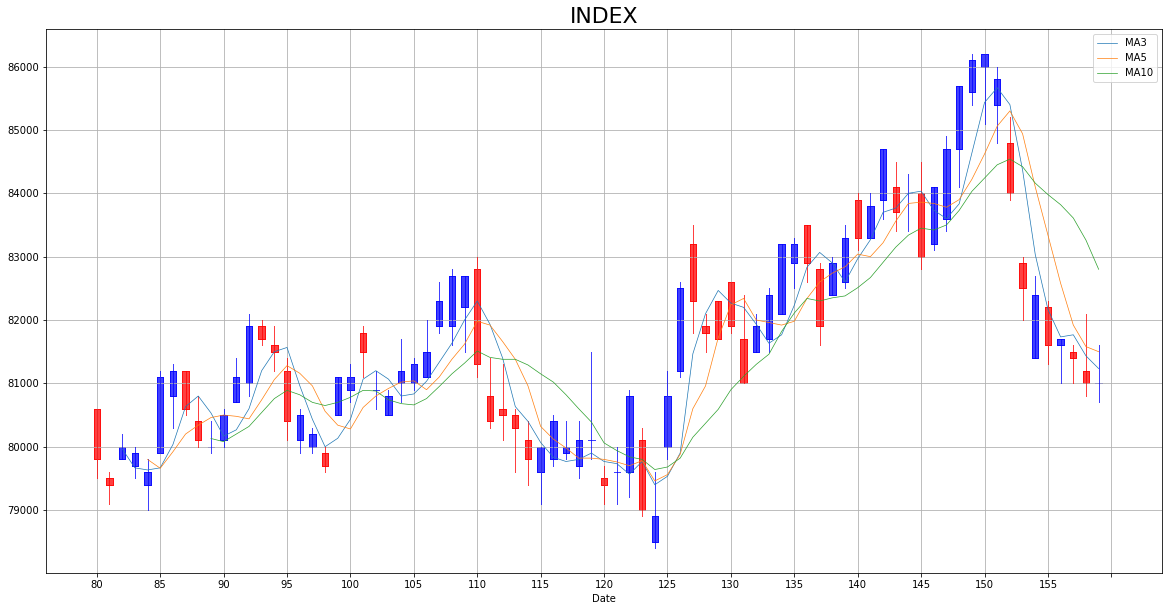

In [25]:
stock_candle('삼성전자')